In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [115]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from pandas_datareader import data as pdr

[*********************100%***********************]  1 of 1 completed


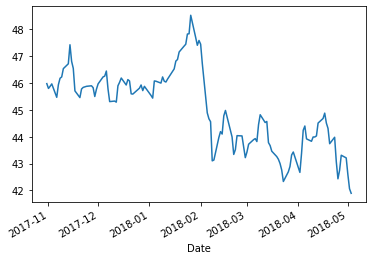

In [118]:
import yfinance as yf

# Get the data for the stock 
data = yf.download('KO','2017-11-01','2018-05-04')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price
data['Close']
data['Close'].plot()
plt.show()

In [119]:
data['Close'].shape

(127,)

In [120]:
xvals=np.arange(0,data['Close'].shape[0])
yvals=data['Close']

stocks_init=350
stocks=stocks_init
cash=500000

preds=[]

n_points=10
for j in np.arange(0,n_points):
    preds.append(yvals[j])

In [121]:
cash-(max(data['Close'])*stocks_init)

483014.5004272461

In [122]:
total_init=(stocks_init*yvals[0])+cash

In [123]:
total_init

516092.9998397827

In [124]:
data['Close'].shape

(127,)

In [125]:
import warnings
from sklearn.linear_model import LinearRegression


warnings.filterwarnings("ignore")


for i in np.arange(n_points,np.array(data['Close']).shape[0],1):

        
    x_pairs=[]
    y_pairs=[]
    
    for j in np.arange(0,n_points):
        x_pairs.append(xvals[i-j])
        y_pairs.append(yvals[i-j])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(data['Close']).shape[0]-1:
        
        regression = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        regression.fit(x_pairs, y_pairs)
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))
        preds.append(pred)
        
        
        if pred-yvals[i]<0:
            if stocks==stocks_init:
                pass
            else:
                stocks=stocks_init
                cash = cash-stocks_init*yvals[i]
        elif pred-yvals[i]>0:
            if stocks==stocks_init:
                stocks=0
                cash = cash + stocks_init*yvals[i]
        else:
            pass

In [126]:
total_init

516092.9998397827

In [127]:
(yvals[-1]-yvals[0])*350

-1431.5000534057617

In [128]:
stocks

0

In [129]:
total_end=(stocks*yvals[-1])+cash

In [130]:
(total_end-total_init)

69.99626159667969